## 1 - Packages

In [3]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## 2 - Overview of the Problem set

**Problem Statement**: You are given the iris dataset which consists of the petal and sepal length and width for 150 plant. the dataset stored in a 150x4 numpy array.

We will build a K-Means cluster algorithm that cluster the plants based on their petal and sepal features

Let's get more familiar with the dataset. Load the data by running the following code.

In [4]:
# Loading iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
# Explore the dataset
print("Name   of the features: ", iris.feature_names)
print("Shape  of the dataset : ", iris.data.shape)
print("Number of the samples : ", iris.data.shape[0])
print("Number of the features: ", iris.data.shape[1])

Name   of the features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape  of the dataset :  (150, 4)
Number of the samples :  150
Number of the features:  4


In [6]:
# Display a portion of the dataset
df = pd.DataFrame(data=iris.data, columns= iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 3 - Finding Optimal Number of Clusters

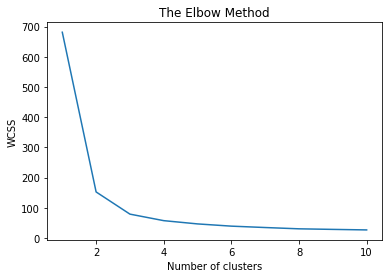

In [7]:
from sklearn.cluster import KMeans
wcss = []
clusters_range = range(1, 11)
for i in clusters_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(clusters_range, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**As we notice from the above graph the optimal number of clusters = 3**

## 4 - Building Model

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

In [9]:
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## 5 - Visualising the Clusters

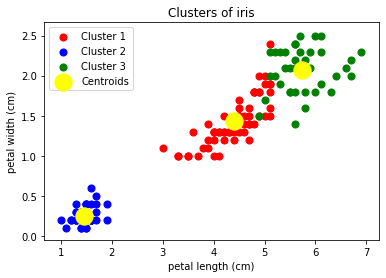

In [10]:
plt.scatter(df.iloc[y_kmeans==0, -2], df.iloc[y_kmeans==0, -1], 
            s=50, c='red', label='Cluster 1')
plt.scatter(df.iloc[y_kmeans==1, -2], df.iloc[y_kmeans==1, -1],
            s=50, c='blue', label='Cluster 2')
plt.scatter(df.iloc[y_kmeans==2, -2], df.iloc[y_kmeans==2, -1],
            s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, -2], kmeans.cluster_centers_[:, -1],
            s=300, c='yellow', label='Centroids')
plt.title('Clusters of iris')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

**As we notice, the K-means finds the correct 3 clusters which represent the 3 types of iris 
that we dealt with it in previous labs!**

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')